# MinMaxScaler for Unsupervised and Supervised Models

#### Using MinMaxScaler to scale the data before using unsupervised and supervised learning on the data to see if it provides a better model. 
<br>

#### Use 3+ supervised machine learning models covered in this class (remember the no free lunch theorem). Use SciKit Learn for this. You may use Tensorflow/Keras for neural networks models.
<br>

#### Use 3+ unsupervised machine learning models covered in this class.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_X = pd.read_csv('test_X.csv')
display(test_X)
test_y = pd.read_csv('test_y.csv')
display(test_y)
train_X = pd.read_csv('train_X.csv')
display(train_X)
train_y = pd.read_csv('train_y.csv')
display(train_y)
val_X = pd.read_csv('val_X.csv')
display(val_X)
val_y = pd.read_csv('val_y.csv')
display(val_y)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,228.969,239.541,113.201,0.00238,0.000010,0.00136,0.00140,0.00408,0.01745,0.154,...,0.01234,0.02827,0.00420,24.547,0.305429,0.681811,-7.314237,0.006274,2.118596,0.091546
1,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
2,110.739,113.597,100.139,0.00356,0.000030,0.00170,0.00200,0.00510,0.01484,0.133,...,0.01285,0.02261,0.00430,26.550,0.369090,0.776158,-6.085567,0.192375,1.889002,0.174152
3,128.940,479.697,88.251,0.00581,0.000050,0.00241,0.00314,0.00723,0.02008,0.221,...,0.01734,0.02548,0.02350,24.743,0.487756,0.684130,-6.186128,0.279933,2.686240,0.152428
4,149.689,160.368,133.608,0.00257,0.000020,0.00116,0.00134,0.00349,0.01346,0.126,...,0.01059,0.01979,0.00578,27.421,0.365488,0.719974,-6.997403,0.210279,1.994387,0.112878
5,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.085,...,0.00719,0.01407,0.00072,32.684,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
6,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,0.191,...,0.01717,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
7,209.144,237.494,109.379,0.00282,0.000010,0.00147,0.00152,0.00442,0.01861,0.170,...,0.01382,0.02925,0.00871,25.554,0.341788,0.678874,-7.040508,0.066994,2.460791,0.101516
8,237.323,243.709,229.256,0.00303,0.000010,0.00173,0.00159,0.00519,0.01242,0.116,...,0.00882,0.02089,0.00533,24.679,0.384868,0.626710,-7.018057,0.176316,1.852402,0.091604
9,199.228,209.512,192.091,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,0.089,...,0.00762,0.01513,0.00167,30.940,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501


,status
0,0
1,1
2,0
3,1
4,1
5,0
6,1
7,0
8,0
9,0


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,260.105,264.919,237.303,0.00339,0.000010,0.00205,0.00186,0.00616,0.02030,0.197,...,0.01367,0.03557,0.00910,21.083,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587
1,252.455,261.487,182.786,0.00185,0.000007,0.00092,0.00113,0.00276,0.01152,0.103,...,0.00860,0.01841,0.00432,26.805,0.610367,0.635204,-7.319510,0.200873,2.028612,0.086398
2,203.184,211.526,196.160,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,0.085,...,0.00726,0.01403,0.00065,33.047,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539
3,145.174,198.109,80.637,0.00733,0.000050,0.00414,0.00422,0.01242,0.02362,0.233,...,0.01944,0.03706,0.01874,18.857,0.637518,0.735546,-5.594275,0.127950,1.765957,0.222716
4,169.774,191.759,151.451,0.01568,0.000090,0.00863,0.00946,0.02589,0.08143,0.821,...,0.08808,0.11411,0.07530,12.359,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,139.224,586.567,66.157,0.03011,0.000220,0.01854,0.01628,0.05563,0.09419,0.930,...,0.06023,0.16654,0.25930,10.489,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
172,198.116,233.099,174.478,0.02714,0.000140,0.01568,0.01699,0.04705,0.08684,1.018,...,0.08318,0.12851,0.16265,9.449,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721
173,150.440,163.441,144.736,0.00396,0.000030,0.00206,0.00233,0.00619,0.02551,0.237,...,0.02148,0.03964,0.00611,23.133,0.352396,0.759320,-6.261446,0.183218,2.264226,0.144105
174,199.228,209.512,192.091,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,0.089,...,0.00762,0.01513,0.00167,30.940,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501


,status
0,0
1,0
2,0
3,1
4,1
...,...
171,1
172,1
173,1
174,0


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,200.714,223.982,89.686,0.00621,0.000030,0.00371,0.00337,0.01112,0.02286,0.207,...,0.01852,0.03576,0.00704,23.239,0.436084,0.727863,-5.258320,0.256454,2.550961,0.232520
1,154.003,160.267,128.621,0.00183,0.000010,0.00076,0.00100,0.00229,0.01030,0.094,...,0.00871,0.01406,0.00243,28.409,0.263654,0.691483,-7.111576,0.144780,2.065477,0.093193
2,113.400,133.344,107.816,0.00451,0.000040,0.00219,0.00283,0.00658,0.04879,0.431,...,0.04370,0.07154,0.02278,19.013,0.647900,0.708144,-4.378916,0.300067,2.445502,0.259451
3,260.105,264.919,237.303,0.00339,0.000010,0.00205,0.00186,0.00616,0.02030,0.197,...,0.01367,0.03557,0.00910,21.083,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587
4,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
5,179.711,225.930,144.878,0.00709,0.000040,0.00391,0.00419,0.01172,0.04313,0.442,...,0.03455,0.06892,0.07223,11.866,0.590951,0.745526,-4.379411,0.375531,3.671155,0.332086
6,115.322,135.738,107.802,0.00619,0.000050,0.00352,0.00329,0.01057,0.03273,0.325,...,0.02931,0.04933,0.02810,19.388,0.577802,0.684373,-5.283009,0.226528,2.442906,0.238281
7,222.236,231.345,205.495,0.00266,0.000010,0.00152,0.00144,0.00457,0.01643,0.145,...,0.01200,0.02602,0.00340,25.856,0.364867,0.694399,-6.966321,0.095882,2.278687,0.103224
8,152.845,163.305,75.836,0.00294,0.000020,0.00121,0.00149,0.00364,0.01828,0.158,...,0.01246,0.03191,0.00609,24.922,0.474791,0.654027,-6.105098,0.203653,2.125618,0.170100
9,122.336,142.369,94.794,0.00727,0.000060,0.00415,0.00339,0.01246,0.02293,0.223,...,0.01771,0.03615,0.03191,22.953,0.611679,0.623731,-5.435100,0.230532,2.699645,0.220546


,status
0,1
1,1
2,1
3,0
4,1
5,1
6,1
7,0
8,1
9,1


array([[1.        , 0.33205166, 0.98925121, ..., 0.32821604, 0.23035006,
        0.06430447],
       [0.95365013, 0.32504365, 0.67538315, ..., 0.42191365, 0.30412809,
        0.08669547],
       [0.65512666, 0.22302517, 0.75238062, ..., 0.3354068 , 0.        ,
        0.        ],
       ...,
       [0.33556095, 0.12483741, 0.45631973, ..., 0.38102704, 0.42250555,
        0.20621422],
       [0.63115802, 0.21891266, 0.72895437, ..., 0.35810229, 0.34155546,
        0.04962844],
       [0.77055905, 0.26349482, 0.80612456, ..., 0.17876861, 0.42977107,
        0.12154432]])

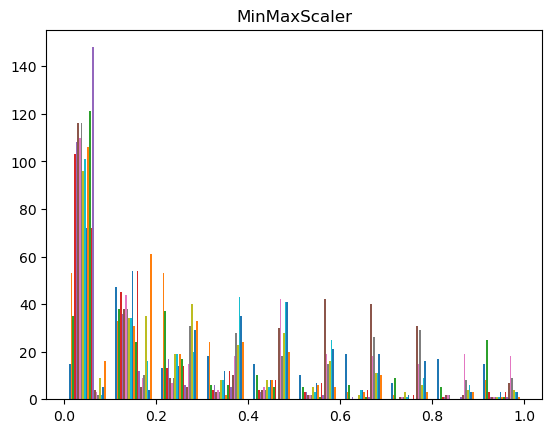

In [5]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
X_train_mm = minmax_scaler.fit_transform(train_X)
X_val_mm = minmax_scaler.transform(val_X)
X_test_mm = minmax_scaler.transform(test_X)
display(X_train_mm)

plt.hist(X_train_mm)
plt.title('MinMaxScaler')
plt.show()

In [7]:
#use the isolation forest model to search for anomalies on the scaled/transformed data
from sklearn.ensemble import IsolationForest

df = pd.concat([train_X, train_y], axis=1)

# create the model
clf = IsolationForest(random_state=42, contamination=0.01)
#clf = IsolationForest(random_state=42, contamination=0.02)
anomaly_threshold = -0.5

# Fit the model to the MinMaxScaler data
clf.fit(X_train_mm)

# create a column for the predictions of the MinMaxScaler data
df['anomaly_score'] = clf.decision_function(X_train_mm)
df['outlier'] = clf.predict(X_train_mm)
mm_anomaly_test = clf.decision_function(X_test_mm)
mm_anomalies_test = mm_anomaly_test < anomaly_threshold
mm_anomaly_val = clf.decision_function(X_val_mm)
mm_anomalies_val = mm_anomaly_val < anomaly_threshold
mm_train_out = df.loc[df['outlier'] == -1].index

# show the number of outliers for the MinMaxScaler data
print('MinMaxScaler')
print(df['outlier'].value_counts())
print(mm_anomalies_test)
print(mm_anomalies_val)
display(df.loc[df['outlier'] == -1])

MinMaxScaler
outlier
 1    174
-1      2
Name: count, dtype: int64
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status,anomaly_score,outlier
43,125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,0.891,...,8.867,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961,1,-0.001802,-1
111,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,1.302,...,8.441,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367,1,-0.031077,-1


In [8]:
# Remove the outliers for each type of scaled/transformed data
X_train_no_outliers_mm = np.delete(X_train_mm, mm_train_out, axis=0)
y_train_no_outliers_mm = np.delete(train_y, mm_train_out)

display(X_train_no_outliers_mm)
display(y_train_no_outliers_mm)

array([[1.        , 0.33205166, 0.98925121, ..., 0.32821604, 0.23035006,
        0.06430447],
       [0.95365013, 0.32504365, 0.67538315, ..., 0.42191365, 0.30412809,
        0.08669547],
       [0.65512666, 0.22302517, 0.75238062, ..., 0.3354068 , 0.        ,
        0.        ],
       ...,
       [0.33556095, 0.12483741, 0.45631973, ..., 0.38102704, 0.42250555,
        0.20621422],
       [0.63115802, 0.21891266, 0.72895437, ..., 0.35810229, 0.34155546,
        0.04962844],
       [0.77055905, 0.26349482, 0.80612456, ..., 0.17876861, 0.42977107,
        0.12154432]])

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0],
      dtype=int64)

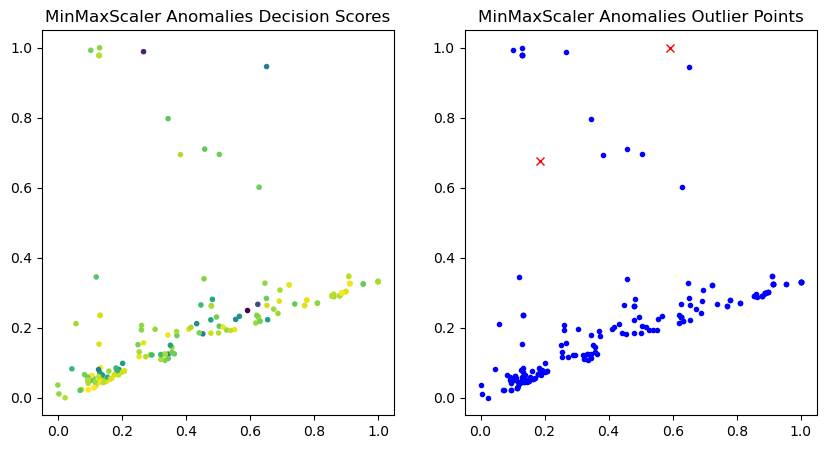

,Inlier Label,Inline Score,Outlier Label,Outline Score
0,1.0,0.270177,-1.0,-0.001802
1,1.0,0.233540,-1.0,-0.031077


In [20]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))

clf.fit(X_train_mm)
predictions_mm = clf.predict(X_train_mm)

ax1.scatter(X_train_mm[:, 0], X_train_mm[:, 1], c=clf.decision_function(X_train_mm), marker='.')
ax1.set_title('MinMaxScaler Anomalies Decision Scores')
ax2.plot(X_train_mm[predictions_mm==1][:,0], X_train_mm[predictions_mm==1][:,1], 'b.')
ax2.plot(X_train_mm[predictions_mm==-1][:,0], X_train_mm[predictions_mm==-1][:,-1], 'rx')
ax2.set_title('MinMaxScaler Anomalies Outlier Points')

plt.show()

df = pd.DataFrame(dict(predicted_label=clf.predict(X_train_mm), score=clf.decision_function(X_train_mm)))
outliers = df[df['predicted_label'] == -1].values
inliers = df[df['predicted_label'] == 1].head(len(outliers)).values
mm_scores = pd.DataFrame(np.concatenate([inliers, outliers], axis=1), 
             columns=['Inlier Label', 'Inline Score', 'Outlier Label', 'Outline Score'])
display(mm_scores)

## PCA for Dimensionality Reduction - MinMaxScaler

Component 1: Explained Variance 0.4949773550479571
Component 2: Explained Variance 0.6987877536675566
Component 3: Explained Variance 0.7830295417411648
Component 4: Explained Variance 0.8358057400121908
Component 5: Explained Variance 0.8785570403419901
Component 6: Explained Variance 0.9158741081433361
Component 7: Explained Variance 0.947299819407915
Component 8: Explained Variance 0.9623050262724377
Component 9: Explained Variance 0.9753954838586358
Component 10: Explained Variance 0.9863026009294213
Component 11: Explained Variance 0.9922089439920695
Component 12: Explained Variance 0.9957598743063796
Component 13: Explained Variance 0.9971637837934355
Component 14: Explained Variance 0.9984271596906162
Component 15: Explained Variance 0.9990360557494631
Component 16: Explained Variance 0.9994033513810046
Component 17: Explained Variance 0.9996999006350616
Component 18: Explained Variance 0.9998822204040004
Component 19: Explained Variance 0.9999720790624327
Component 20: Explaine

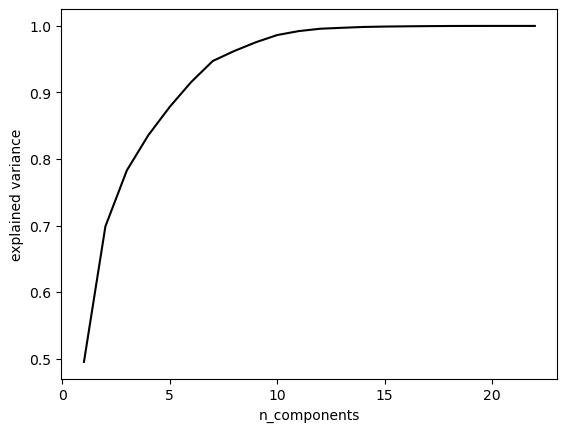

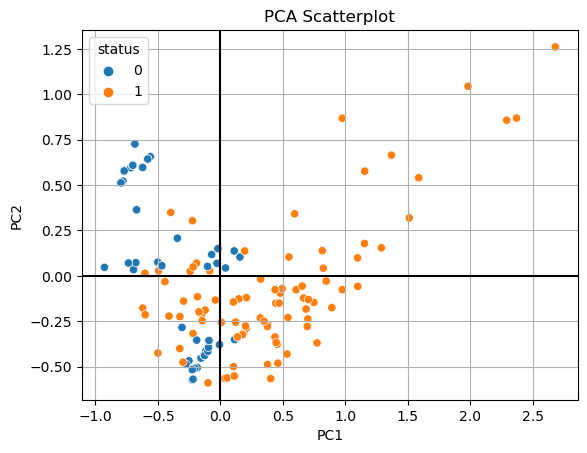

In [24]:
#use principal component analysis to determine catagories for the data
from sklearn.decomposition import PCA


#test n_number of components to find the best fit for the data
n_components = np.arange(1, 23)
models = [PCA(n).fit(X_train_mm) for n in n_components]

#plot the explained variance ratio for each number of components
plt.plot(n_components, [m.explained_variance_ratio_.sum() for m in models], color='black')
for i, model in enumerate(models):
    explained_variance = model.explained_variance_ratio_.sum()
    print(f'Component {n_components[i]}: Explained Variance {explained_variance}')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()


#create the model
pca = PCA(n_components = 2)

#fit the model and transform the data
transformed = pca.fit_transform(X_train_mm)

#create a dataframe of the transformed data
df_mm = pd.DataFrame(transformed, columns=['PC1', 'PC2'])
df_mm['status'] = train_y

#create a scatterplot of the data
sns.scatterplot(x='PC1', y='PC2', hue='status', data=df_mm)

#make title
plt.title('PCA Scatterplot')
plt.grid()
#add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#show the plot
plt.show()

## PCA for Dimensionality Reduction - MinMaxScaler Outliers Removed

Component 1: Explained Variance 0.46806411276840526
Component 2: Explained Variance 0.6743220950786329
Component 3: Explained Variance 0.766563903915327
Component 4: Explained Variance 0.825969381437026
Component 5: Explained Variance 0.871016821325297
Component 6: Explained Variance 0.9126395474456739
Component 7: Explained Variance 0.9442109229994563
Component 8: Explained Variance 0.9609177294096722
Component 9: Explained Variance 0.9745668346053433
Component 10: Explained Variance 0.9863825735897147
Component 11: Explained Variance 0.9926698047892573
Component 12: Explained Variance 0.9954824375547934
Component 13: Explained Variance 0.996991320277389
Component 14: Explained Variance 0.9983104835482073
Component 15: Explained Variance 0.9989932165257778
Component 16: Explained Variance 0.999400131998788
Component 17: Explained Variance 0.9997132716699351
Component 18: Explained Variance 0.9998759699721409
Component 19: Explained Variance 0.9999723899150206
Component 20: Explained V

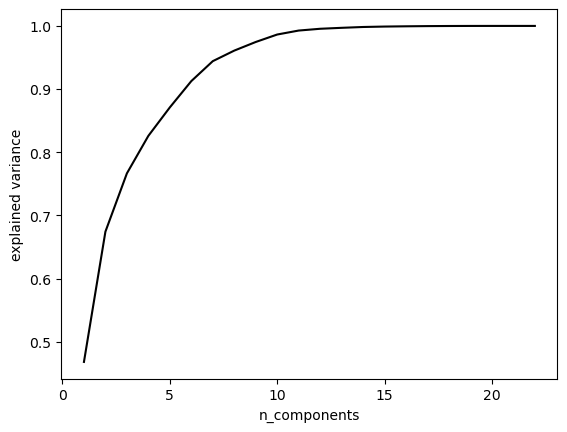

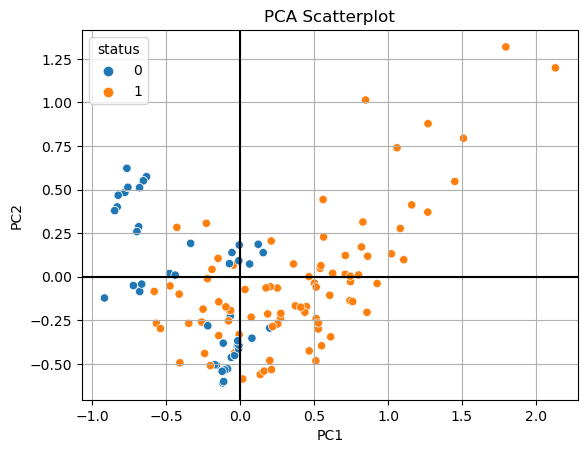

In [25]:
#use principal component analysis to determine catagories for the data
from sklearn.decomposition import PCA


#test n_number of components to find the best fit for the data
n_components = np.arange(1, 23)
models = [PCA(n).fit(X_train_no_outliers_mm) for n in n_components]

#plot the explained variance ratio for each number of components
plt.plot(n_components, [m.explained_variance_ratio_.sum() for m in models], color='black')
for i, model in enumerate(models):
    explained_variance = model.explained_variance_ratio_.sum()
    print(f'Component {n_components[i]}: Explained Variance {explained_variance}')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()


#create the model
pca = PCA(n_components = 2)

#fit the model and transform the data
transformed = pca.fit_transform(X_train_no_outliers_mm)

#create a dataframe of the transformed data
df_mm_no = pd.DataFrame(transformed, columns=['PC1', 'PC2'])
df_mm_no['status'] = y_train_no_outliers_mm

#create a scatterplot of the data
sns.scatterplot(x='PC1', y='PC2', hue='status', data=df_mm_no)

#make title
plt.title('PCA Scatterplot')
plt.grid()
#add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#show the plot
plt.show()

The explained variance for the earlier components does not perform as well as RobustScaler or PowerTransformer. 